In [1]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import pyplot as plt

# **Generate test datasets**

In [2]:
# Create .txt files.

x1 = list(range(-100,100))
y1 = [val1**2 for val1 in x1]

x2 = list(range(-100,100))
y2 = [-val2**2 for val2 in x2]

with open("./input_files/dataset1.txt", "w") as out1:
    for x, y in zip(x1,y1):
        print(f"{x} {y}", file=out1)
        
with open("./input_files/dataset2.txt", "w") as out2:
    for x, y in zip(x2,y2):
        print(f"{x} {y}", file=out2)


# **Load datasets**

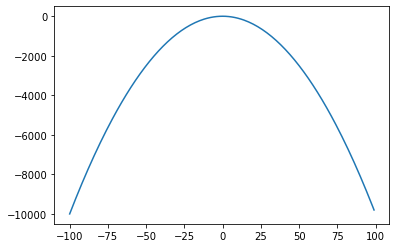

In [5]:
# Assuming the length of x-axis is the same in both datasets

file1, file2 = "./input_files/dataset1.txt", "./input_files/dataset2.txt"
outfile = './output_gifs/example_01.gif'

def get_vars(file):
    """Open files where the data is stored and return varibles"""
    data = []
    with open(file, "r") as filein:
        for line in filein:
            line = line.split()
            data.append((int(line[0]), int(line[1])))

    return np.array(data)

dataset1 = get_vars(file1)
dataset2 = get_vars(file2)

plt.plot(dataset2[:, 0], dataset2[:, 1]) 
plt.show()


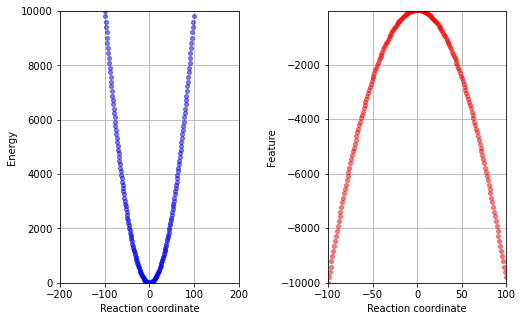

In [6]:
def data_gen():
    for frame1, frame2 in zip(dataset1, dataset2):
        yield frame1, frame2

        
def init():
    # Dataset 1
    ax1.set_xlim(-200, 200)
    ax1.set_ylim(0, 10000)
    ax1.set_xlabel("Reaction coordinate")
    ax1.set_ylabel("Energy")
    
    # Dataset 2
    ax2.set_xlim(-100, -50) # Actually ax2.set_xlim(-200, 200)
    ax2.set_ylim(-10000, -9000) # Actually ax2.set_ylim(-10000, 100)
    ax2.set_xlabel("Reaction coordinate")
    ax2.set_ylabel("Feature")
    
    del xdata2[:]
    del ydata2[:]
    
    return line1, line2,



fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8, 5))
plt.subplots_adjust(wspace=0.5)

line1, = ax1.plot([], [], 'o', ms=4, alpha=0.5, c='b')
line2, = ax2.plot([], [], 'o', ms=4, alpha=0.5, c='r')

ax1.grid()
ax2.grid()

xdata1, ydata1 = [], [] 
xdata2, ydata2 = [], [] 


def run(data):
    # Dataset 1  
    x1 = data[0][0]
    y1 = data[0][1]
    xdata1.append(x1)
    ydata1.append(y1)
    
    xmin1, xmax1 = ax1.get_xlim()
    
    # Update ax2 x-axis limit values as the animation developes
    if x1 >= xmax1:
        ax1.set_xlim(xmin1, 1.5*xmax1)
        ax1.figure.canvas.draw()

    line1.set_data(xdata1, ydata1)
    
    # Dataset 2
    x2 = data[1][0]
    y2 = data[1][1]
    xdata2.append(x2)
    ydata2.append(y2)
    
    xmin2, xmax2 = ax2.get_xlim()
    ymin2, ymax2 = ax2.get_ylim()
    
    # Update ax2 y-axis limit values as the animation developes
    if x2 >= xmax2:
        ax2.set_xlim(xmin2, xmax2+10)
        ax2.figure.canvas.draw()
    
         
    if y2 >= ymax2:
        ax2.set_ylim(ymin2, ymax2/1.1)
        ax2.figure.canvas.draw()
    

    line2.set_data(xdata2, ydata2)
    
    return line1, line2



ani = animation.FuncAnimation(fig, run, data_gen(), interval=10, init_func=init, save_count=1500)

writergif = animation.PillowWriter(fps=10)
ani.save(outfile, writer=writergif)